#### MATH 382 - Fall 2021
## Scientific Computing
Yashin Rodriguez
<hr>

# Lab Assignment #3: Linear Regression and Optimization

<hr>

## Lab Description

In this lab we will use least squares to fit linear data. We will use four different methods for the least squares fitting, after setting up the overdetermined system $X\alpha = {\bf y}$, will find the best linear fit ${\bf \alpha}$ by:

<ol>
<li>Solving the normal equations $X^TX\alpha = X^T{\bf y}$.</li><br>
<li>Minimizing the objective function $f(\alpha) = \frac{1}{n} \| X \alpha - {\bf y} \|_2^2$ using gradient descent</li><br>
<li>Minimizing the above objective function with the additional constraint $\| \alpha \|_2^2 \leq 1$ using both of the above methods with Lagrange multipliers</li><br>
<li>Minimizing the above objective function with the additional constraint $\| \alpha \|_1 \leq 1$ using both of the above methods with Lagrange multipliers</li>
</ol>

This will allow us to write a model $\ell(x) = ax + b$ where $(a, b) = \alpha$ is the least squares solution of the system $X \alpha = {\bf y}$. We will plot the line obtained with the different methods, observe how well each line fits the data, and compare the results obtained with the different methods and their computational cost (CPU times). <br>

${\bf Data}$: We'll use some made up data for this exercise.

<hr>

## Preliminaries

<ol>
<li>Save this document somewhere in your files system where you can easily locate it.</li><br>
<li>In the same directory where you saved this document, create a (sub)directory within the above named data )or verify one already exists).</li><br>
<li>Download the data for this assignment and save it to the data (sub)directory</li>
</ol>

You should now be ready to work on the assignment...

<hr>

## <tt>import</tt> Python Packages

In [35]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import time

<hr>

## Problem \#1

Load the data, verify its dimensions $300 \times 2$, and set up the coefficient matrix $X$ and the vector ${\bf y}$. 
You may want to verify the dimensions of the coefficient matrix $X$ and the vector ${\bf y}$ too.

<hr>

In [36]:
# Enter your code here
data = np.loadtxt('data/dataLS.txt', delimiter = ',')
print(data.shape)
print(data[0:10,:])

X = np.zeros([300,2])
X[:,0] =data[:,0]
X[:,1] = np.ones(300)
y = data[:,1]

(300, 2)
[[-0.475858    1.61655   ]
 [-0.291753    0.184802  ]
 [-0.156001    0.518786  ]
 [-0.155835    0.175825  ]
 [-0.0830172   0.716709  ]
 [-0.0378482  -0.175242  ]
 [-0.0354125  -0.419593  ]
 [-0.031637   -0.175356  ]
 [-0.0278986   0.766967  ]
 [-0.00824979  1.288     ]]


<hr>

## Problem \#2

Plot the data $(x_i, y_i)$

<hr>

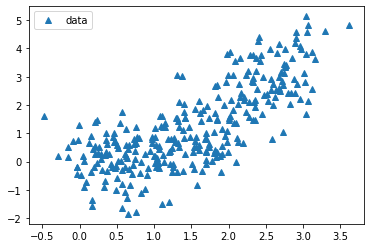

In [37]:
# Enter your code here
fig2, ax2 = plt.subplots()

ax2.plot(X[:,0], y,'^',label="data")
ax2.legend()

<hr>

## Problem \#3

Find the least squares solution of the system $X{\bf \alpha} = {\bf y}$ using the Moore-Penrose pseudo inverse of $X$, $X^+$, using the Singular Value Decomposition of $X$, print the solution, plot the solution $y_{fit} = ax + b$ on top of the data, and find out the time it takes Python to compute the solution. Follow these steps: <br>

a. Find the SVD of the matrix $X$, U, s, VT = np.linalg.svd(X), and use it to compute $X^+ = VS^+ U^T$. <br>

b. Solve for the slope, $a$, and y-intercept, $b$: $[a, b] = X^+ y$; print $a$ and $b$. <br>

c. Plot the data again and the solution $y_{LS} = ax + b$ on the same figure.<br>

Make sure you include time commands to find the CPU time it took to find the solution this way. <br>

<hr>

slope of linear model: a_LS = 1.2204949901439193 

y-intercept of linear model: b_LS = -0.5877619479616358 

cpu time to solve for a and b: t_LS = 0.0073019999999992535 s

Mean squared error: MSE =  0.8982612511595753


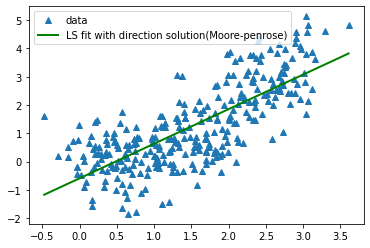

In [50]:
# Enter your code here
t_start_LS = time.process_time()

# Find the Singular Value Decomposition of X:
# U and V are orthogonal matrices U^{-1} = U^T
# s in a vector containing the singular values of X, you can write the matrix S in X = USV^T from s

U, s, Vt = LA.svd(X)

S = np.diag(s)
Z = np.zeros((X.shape[0] - X.shape[1], X.shape[1]))
S = np.vstack((S, Z))
sp = np.zeros(s.shape)

# compute S^+ from S

for i in range(0, s.shape[0]):
    if s[i] == 0.0:
         sp[i] = 0
    else:
         sp[i] = 1/s[i] 

Sp = np.diag(sp)
Z = np.zeros((X.shape[1], X.shape[0] - X.shape[1]))
Sp = np.hstack((Sp, Z))
Xp = Vt.dot(Sp.dot(U.T))
        
alpha = Xp.dot(y)

t_LS = time.process_time() - t_start_LS

a_LS = alpha[0] #first component of alpha
b_LS = alpha[1]  #2nd component of alpha

print('slope of linear model: a_LS =',a_LS,'\n')
print('y-intercept of linear model: b_LS =',b_LS,'\n')
print('cpu time to solve for a and b: t_LS =',t_LS,'s\n')

print('Mean squared error: MSE = ', LA.norm(y - X.dot(np.array([a_LS, b_LS])))**2/X.shape[0])

X_sort = np.sort(X,0)
y_LS =X_sort.dot(alphak)

fig3, ax3 = plt.subplots()

ax3.plot(X[:,0],y,'^',lw=2,label="data")
ax3.plot(X_sort[:,0], y_LS,'g',lw=2,label="LS fit with direction solution(Moore-penrose)")
ax3.legend()

<hr>

## Problem \#4

Find the best fit by minimizing the objective function $f(\alpha) = \frac{1}{n} \|X \alpha - {\bf y} \|_2^2$ using gradient descent. Follow these steps:<br>

a. Define the function $f(\alpha)$. <br>

b. Define the vector function $\nabla f(\alpha)$. <br>

c. Write a short script that implements gradient descent. Use <em>learning rate</em> $\gamma = 10^{-1}$, and <em>tolerance</em> $\tau = 10^{-8}$. Keep track of the number of iterations. <br>

d. Plot the data again and the solution $y_{GD} = ax + b$ in the same axis. <br>

Make sure you include time commands to find the CPU time it took to find the solution this way, and calculate the <em>mean squared error</em>.<br>

<hr>

slope of linear model: a =  1.220494979339202 

y-intercept of linear model: b =  -0.5877619274306465 

cpu time to solve for a and b: t_GD =  0.012083999999997985 s 

number of iterations: k =  412 

Mean squared error: MSE =  0.8982612511595753 

alpha_norm =  1.354648322602286 



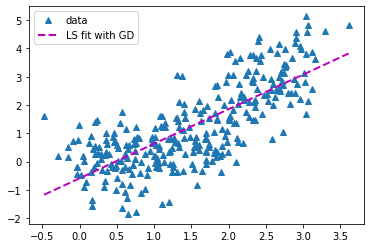

In [87]:
# Enter your code here

def fobj(alpha, X, y):
    n = X.shape[0]
    return (LA.norm(X.dot(alpha) - y)**2)/n

def gradf(alpha, X, y):
    n = X.shape[0]
    return -2.0*(X.T.dot(y) - (X.T.dot(X)).dot(alpha))/n

t_start_GD = time.process_time()
gamma = 1.0e-1
tau = 1.0e-8
alphak = np.ones(2)
k = 0
kmax = 1000
fk = fobj(alphak, X, y)
gradk = gradf(alphak, X, y)

while fk > 1.0e-12 and k < kmax and LA.norm(gradk) > tau:
    alphak = alphak - gamma*gradk
    fk = fobj(alphak, X, y)
    gradk = gradf(alphak, X, y)
    k += 1
    
t_GD = time.process_time() - t_start_GD

print('slope of linear model: a = ', alphak[0], '\n')
print('y-intercept of linear model: b = ', alphak[1], '\n')

print('cpu time to solve for a and b: t_GD = ', t_GD, 's \n')

print('number of iterations: k = ', k, '\n')

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak))**2/X.shape[0], '\n')

print('alpha_norm = ', np.sqrt(alphak.T.dot(alphak)), '\n')

X_sort = np.sort(X,0)
y_GD = X_sort.dot(alphak)

fig4, ax4 = plt.subplots()

ax4.plot(x, y, '^', label = "data")
ax4.plot(X_sort[:,0], y_GD, '--m', lw = 2, label = "LS fit with GD")
ax4.legend()

<hr>

## Problem \#5

<b>Ridge Regression:</b> Find the best fit by minimizing the objective function $f(\alpha) = \frac{1}{n} \|X \alpha - {\bf y} \|_2^2$ subject to the constraint $\| \alpha \|_2^2\leq 1$ using gradient descent on the Lagrangian of $f(\alpha)$. Follow these steps:<br>

a. Define the function $L_2(\alpha, s) = f(\alpha) + s \alpha^T \alpha$. <br>

b. Define the vector function $\nabla L_2(\alpha, s)$. <br>

c. Write a short script that implements gradient descent on $L_2(\alpha, s)$. Use <em>learning rate</em> $\gamma = 10^{-1}$, and <em>tolerance</em> $\tau = 10^{-8}$. Try different values of $s \in [0, 0.2]$ (start with $s = 0$ and compare your result with that in Problem #4), and specify which value you used to obtain the results you present.Keep track of the number of iterations. <br>

d. Plot the data again and the solution $y_{R} = ax + b$ for two different values of $s$ in the same set of axis. <br>

Make sure you include time commands to find the CPU time it took to find the solution this way, and calculate the <em>mean squared error</em>.<br>

<hr>

slope of linear model: a_R =  0.6601278747979582 

y-intercept of linear model: b_R =  0.7483430643 

cpu time to solve for a and b: t_R =  0.0011410000000005027 s 

number of iterations: k =  1 

Mean squared error: MSE =  1.4045792962747072 

alpha_norm =  0.9978908522334408 



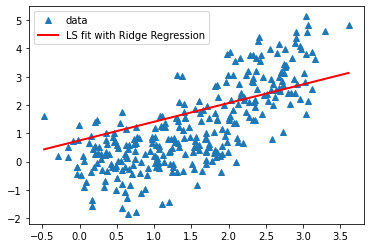

In [125]:
# Enter your code here

def LobjR(X,alpha,y,s):
    n = X.shape[0]
    return (LA.norm(X.dot(alpha) - y)**2)/n + s*LA.norm(alpha)**2

def gradLR(X,alpha,y,s):
    n = X.shape[0]
    XT = X.T
    return  -2.0*(X.T.dot(y) - (X.T.dot(X)).dot(alpha))/n

    
t_start_R = time.process_time()
s = 0.15444
gamma = 1.0e-1
delta = 1.0e-8
alphak = np.ones(2)
k = 0
kmax = 1000

Lk = LobjR(X,alpha,y,s)
gradk = gradLR(X, alphak, y, s)

while Lk > 1.0e-14 and k < kmax and LA.norm(gradk) > tau:
    alphak -= gamma*gradk
    Lk = LobjR(X,alpha,y,s)
    gradk = gradLR(X,alpha,y,s)
    k +=1
    
t_R = time.process_time()- t_start_R

print('slope of linear model: a_R = ', alphak[0], '\n')
print('y-intercept of linear model: b_R = ', alphak[1], '\n')

print('cpu time to solve for a and b: t_R = ', t_R, 's \n')

print('number of iterations: k = ', k, '\n')

print('Mean squared error: MSE = ', LA.norm(y - X.dot(alphak))**2/X.shape[0], '\n')

print('alpha_norm = ', np.sqrt(alphak.T.dot(alphak)), '\n')


a_R,b_R=alpha[0],alpha[1]

y_R = X_sort.dot(alphak)

fk = LobjR(X,alpha,y,s)

fig5, ax5 = plt.subplots()

ax5.plot(x, y, '^', label = "data")
ax5.plot(X_sort[:,0], y_R,'r',lw=2,label="LS fit with Ridge Regression")
ax5.legend()

<hr>

## Problem \#6

<b>Lasso Regression:</b> Find the best fit by minimizing the objective function $f(\alpha) = \frac{1}{n} \|X \alpha - {\bf y} \|_2^2$ subject to the constraint $\| \alpha \|_1\leq 1$ using gradient descent on the Lagrangian of $f(\alpha)$. Follow these steps:<br>

a. Define the function $L_1(\alpha, s) = f(\alpha) + s \| \alpha \|_1 $. <br>

b. Define the vector function $\nabla L_1(\alpha, s)$. <br>

c. Write a short script that implements gradient descent on $L_1(\alpha, s)$. Use <em>learning rate</em> $\gamma = 10^{-1}$, and <em>tolerance</em> $\tau = 10^{-8}$. Try different values of $s \in [0, 0.2]$ (start with $s = 0$ and compare your result with that in Problem #4), and specify which value you used to obtain the results you present.Keep track of the number of iterations. <br>

d. Plot the data again and the solution $y_{L} = ax + b$ for two different values of $s$ in the same set of axis. <br>

Make sure you include time commands to find the CPU time it took to find the solution this way, and calculate the <em>mean squared error</em>.<br>

<hr>

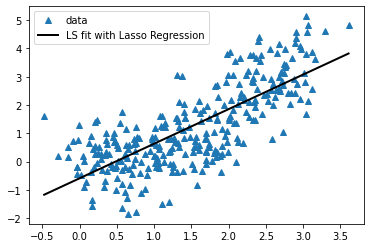

In [62]:
# Enter your code here

def LobjL(X,alpha,y,s):
    n = X.shape[0]
    return (LA.norm(X.dot(alpha) - y)**2)/n +s.LA.norm(alpha,1)

def gradLL(X,alpha,y,s):
    n = X.shape[0]
    XT = X.T
    return -2.0*(X.T.dot(y) - (X.T.dot(X)).dot(alpha))/n + s*np.sign(alpha)

t_start_L = time.process_time()
s = 0.1
y_L=X_sort.dot(alphak)
fig6, ax6 = plt.subplots()

ax6.plot(x, y, '^', label = "data")
ax6.plot(X_sort[:,0], y_L, 'k', lw = 2, label = "LS fit with Lasso Regression")
ax6.legend()

<hr>

## Problem \#7

Plot the data and the all four solutions on the same window.

<hr>

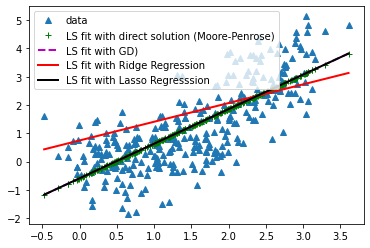

In [124]:
# Enter your code here

fig7, ax7 = plt.subplots()

ax7.plot(x, y, '^', label = "data")
ax7.plot(X_sort[:,0], y_LS, '+g', lw = 2, label = "LS fit with direct solution (Moore-Penrose)")
ax7.plot(X_sort[:,0], y_GD, '--m', lw = 2, label = "LS fit with GD)")
ax7.plot(X_sort[:,0], y_R, 'r', lw = 2, label = "LS fit with Ridge Regression")
ax7.plot(X_sort[:,0], y_L, 'k', lw = 2, label = "LS fit with Lasso Regresssion")

ax7.legend()